# Ad_hoc. Python


 ####  Дедуник Ирина

## Задание 3

Вы работаете продуктовым аналитиком в агрегаторе такси SkyTaxi, и ваша задача - оценить результаты АВ-теста.

Тест предполагает введение новой платежной механики, которая должна немного понизить цену на услугу. Тест проводится путем разделения всех просмотров цены на группы А и В.

* ℹ️ Просмотр - это событие, когда клиент вводит в приложении точку В и видит отображенную цену заказа. После этого он может или конвертироваться в созданный заказ (если цена его устроит), или нет.

**Ваша задача - исследовать результат и понять, влияет ли повышение цены на конверсию из просмотра в создание заказа.**

* Для выполнения задания воспользуйтесь Python и оформите результат как .ipynb файл (текстовые выводы оформить там же).


### Задание 3.1
Импортируйте файл с данными в Jupyter Notebook и расшифруйте идентификаторы городов с помощью листа city_dict

In [1]:
import pandas as pd
import datetime 
import binascii 
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.proportion as proportion
# from termcolor import colored
import sys
# from termcolor import cprint

In [2]:
df_data = pd.read_excel(io='data/dataset_ad_hoc.xlsx'
                       , sheet_name = 'Dataset')
df_data.info()
# df_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21939 entries, 0 to 21938
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_view      21939 non-null  int64         
 1   time_view    21939 non-null  datetime64[ns]
 2   id_group     21939 non-null  int64         
 3   id_city      21939 non-null  int64         
 4   nflag_order  21939 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 857.1 KB


In [3]:
df_data['id_view'].nunique()

21939

In [4]:
df_city = pd.read_excel(io='data/dataset_ad_hoc.xlsx'
                       , sheet_name = 'city_dict')
df_city.info()
# df_city.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_city    11 non-null     int64 
 1   name_city  11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [5]:
df_city['name_city'].nunique()

11

In [6]:
df_data = pd.merge(df_data, df_city, how='left')
df_data.head(10)
# df_data.info()

,id_view,time_view,id_group,id_city,nflag_order,name_city
0,10457162393,2023-01-17 13:56:06.118,0,3,1,Новосибирск
1,10457152884,2023-01-30 17:38:18.629,1,1,1,Москва
2,10457162947,2023-01-07 14:06:22.689,1,1,1,Москва
3,10457197478,2023-01-02 11:02:58.189,0,3,0,Новосибирск
4,10457176480,2023-01-04 22:56:19.240,0,1,1,Москва
5,10457147632,2023-01-28 09:05:01.472,0,2,0,Санкт-Петербург
6,10457135372,2023-01-15 10:03:58.011,0,3,0,Новосибирск
7,10457171869,2023-01-26 21:24:13.151,1,4,1,Казань
8,10457189220,2023-01-29 11:11:42.648,1,1,1,Москва
9,10457195432,2023-01-18 11:37:15.581,1,2,1,Санкт-Петербург


### Задание 3.2
Рассчитайте результаты АВ-теста и с помощью статистического критерия сделайте вывод

In [7]:
###### Проверяем как клиенты разбиты на группы А и В и нет пустых групп
df_data_group_all = df_data.groupby(['id_group']).agg(count_all = ('id_view','count'),
                                                      view2order = ('nflag_order','sum')).reset_index()
df_data_group_all['view2order_conv'] = df_data_group_all['view2order'] / df_data_group_all['count_all'] 
df_data_group_all

,id_group,count_all,view2order,view2order_conv
0,0,10826,6659,0.615093
1,1,11113,7510,0.675785


In [8]:
# Рассчитаем результаты АВ-теста и с помощью статистического критерия сделаем вывод
def ttest_calc(A, B, alpha = 0.05):
    s,p = st.ttest_ind(A, B)
    
    if p < alpha:
        print("Есть статистически значимая разница.")
        print("P_value =", np.round(p, decimals = 3), "Разница средних =",np.round(B.mean() - A.mean(), decimals = 2))
        if B.mean() > A.mean():
            print("Группа В (с новой платежной механикой) - ЛУЧШЕ")
            print("")
        else:
            print("Группа В (с новой платежной механикой) - ХУЖЕ")  
            print("")
    else:
        print("Нет статистически значимой разницы.")
        print("P_value =", np.round(p, decimals = 3), "Разница средних =",np.round(B.mean() - A.mean(), decimals = 2))
        print("")
    return s, p


In [9]:
ttest_calc(A = df_data[df_data['id_group'] == 0]['nflag_order'], B = df_data[df_data['id_group'] == 1]['nflag_order'])

Есть статистически значимая разница.
P_value = 0.0 Разница средних = 0.06
Группа В (с новой платежной механикой) - ЛУЧШЕ



(-9.41595134321716, 5.1365957325220535e-21)

### Задание 3.3
Запустите цикл, который пробежится по всем городам в датасете. Выявите те города, в которых есть статистически значимая разница между группами А и В. Создайте переменную типа "список", которая будет хранить эти города.

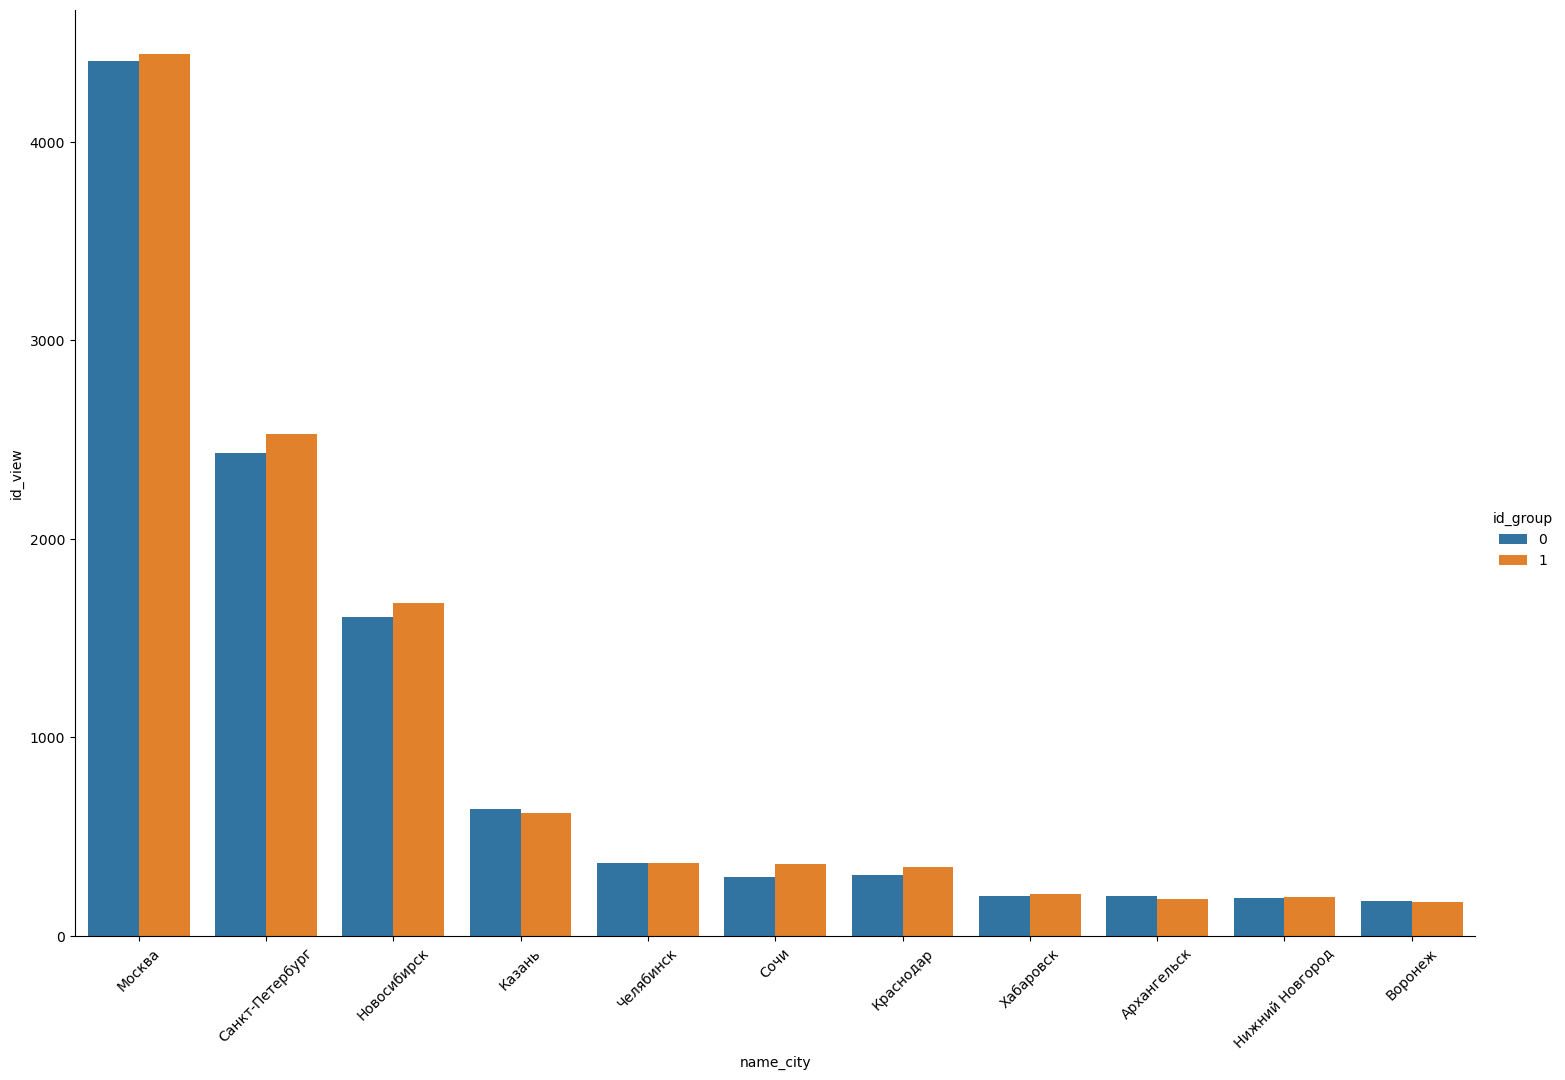

In [10]:
###### Проверяем, как клиенты в каждом городе разбиты на группы А и В и нет ли пустых групп
def plot_segments_distribution(df, segment_columns, test_factor):
    for segment in segment_columns:
        aggregated_data = df.groupby(by = [test_factor, segment])['id_view'].count().reset_index().sort_values(by = 'id_view', ascending = False)
        sns.catplot(x = segment, 
                    y = 'id_view', 
                    hue = test_factor, # сообщаем, что хотим, чтобы разные группы имели разный цвет
                    data = aggregated_data, 
                    kind = "bar", 
                    height = 10, # задаем размер графика 
                    aspect = 1.5) # задаем ширину столбца
        plt.xticks(rotation=45)
        
plot_segments_distribution(df_data, #датафрейм
                           ["name_city"], #сегменты
                           "id_group") #тест-фактор
plt.show()

In [11]:
###### Проверяем как клиенты в каждом городе разбиты на группы А и В и какая их конверсия в платеж
df_data_group_city = df_data.groupby(['name_city','id_group']).agg(count_all = ('id_view','count'),
                                                      view2order = ('nflag_order','sum')).reset_index().sort_values(by='count_all', ascending=False) 
df_data_group_city['view2order_conv'] = df_data_group_city['view2order'] / df_data_group_city['count_all'] 
df_data_group_city

,name_city,id_group,count_all,view2order,view2order_conv
9,Москва,1,4444,3075,0.691944
8,Москва,0,4405,2719,0.617253
15,Санкт-Петербург,1,2528,1717,0.679193
14,Санкт-Петербург,0,2431,1479,0.608392
13,Новосибирск,1,1678,1096,0.653159
12,Новосибирск,0,1609,1011,0.628341
4,Казань,0,639,381,0.596244
5,Казань,1,622,422,0.678457
20,Челябинск,0,370,220,0.594595
21,Челябинск,1,366,235,0.642077


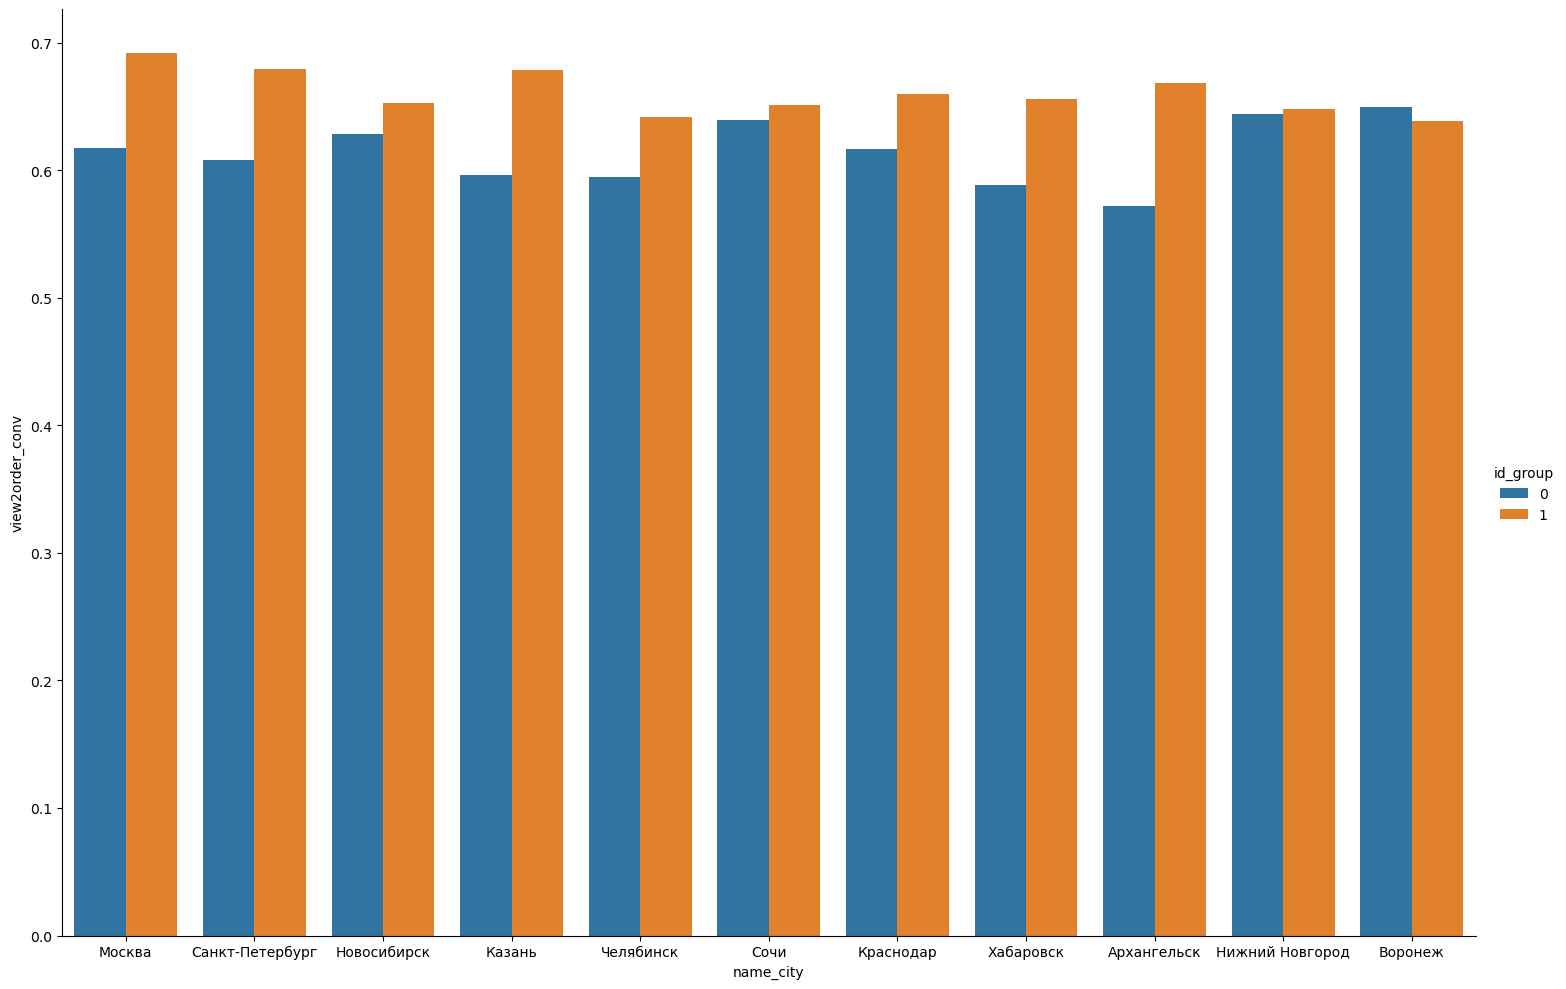

In [12]:
# Диаграмма конверсий в платеж по городам и группам
sns.catplot(x = 'name_city', 
            y = 'view2order_conv', 
            hue = 'id_group',
            data = df_data_group_city, 
            kind = "bar", 
            height = 10,  
            aspect = 1.5)
plt.show()

In [13]:
cities = list(df_data_group_city['name_city'].unique())
cities

['Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Казань',
 'Челябинск',
 'Сочи',
 'Краснодар',
 'Хабаровск',
 'Архангельск',
 'Нижний Новгород',
 'Воронеж']

In [14]:
cities_significance = []

for i in cities:
    df_data_city = df_data[df_data['name_city'] == i]
    print('\033[1m' + i +'\033[0m' )
    
    s,p = ttest_calc(A = df_data_city[df_data_city['id_group'] == 0]['nflag_order'], 
                     B = df_data_city[df_data_city['id_group'] == 1]['nflag_order'])
    if p < 0.05:
        cities_significance.append(i)
    
cities_significance   

Москва
Есть статистически значимая разница.
P_value = 0.0 Разница средних = 0.07
Группа В (с новой платежной механикой) - ЛУЧШЕ

Санкт-Петербург
Есть статистически значимая разница.
P_value = 0.0 Разница средних = 0.07
Группа В (с новой платежной механикой) - ЛУЧШЕ

Новосибирск
Нет статистически значимой разницы.
P_value = 0.138 Разница средних = 0.02

Казань
Есть статистически значимая разница.
P_value = 0.002 Разница средних = 0.08
Группа В (с новой платежной механикой) - ЛУЧШЕ

Челябинск
Нет статистически значимой разницы.
P_value = 0.185 Разница средних = 0.05

Сочи
Нет статистически значимой разницы.
P_value = 0.765 Разница средних = 0.01

Краснодар
Нет статистически значимой разницы.
P_value = 0.249 Разница средних = 0.04

Хабаровск
Нет статистически значимой разницы.
P_value = 0.157 Разница средних = 0.07

Архангельск
Нет статистически значимой разницы.
P_value = 0.051 Разница средних = 0.1

Нижний Новгород
Нет статистически значимой разницы.
P_value = 0.93 Разница средних = 0.0

['Москва', 'Санкт-Петербург', 'Казань']

### Задание 3.4
Создайте дополнительную колонку со значением 0 или 1 в зависимости от часа заказа.

1 - если час пик (возьмите, например, 7,8,9,10,17,18,19,20), а 0 - все остальные часы.

Проверьте результат АВ-теста по отдельности на пиковых и не-пиковых заказах и сделайте выводы.

In [15]:
# Создать дополнительную колонку со значением 0 или 1 в зависимости от часа заказа.
# 1 - если час пик (7,8,9,10,17,18,19,20), а 0 - все остальные часы
df_data['rush_hour_flag'] = np.where(df_data['time_view'].dt.hour.isin([7,8,9,10,17,18,19,20]), 1,0)

In [16]:
# Проверить результат АВ-теста по отдельности на пиковых и не-пиковых часах и сделать выводы
for i in df_data['rush_hour_flag'].unique():
    df_data_rush_hour = df_data[df_data['rush_hour_flag'] == i]
    print('\033[1m' 'Группа '+ str(i) +'\033[0m' )
    
    ttest_calc(A = df_data_rush_hour[df_data_rush_hour['id_group'] == 0]['nflag_order'], 
               B = df_data_rush_hour[df_data_rush_hour['id_group'] == 1]['nflag_order'])

Группа 0
Есть статистически значимая разница.
P_value = 0.0 Разница средних = 0.06
Группа В (с новой платежной механикой) - ЛУЧШЕ

Группа 1
Есть статистически значимая разница.
P_value = 0.0 Разница средних = 0.07
Группа В (с новой платежной механикой) - ЛУЧШЕ



In [17]:
# Проверить результат АВ-теста по отдельности на пиковых и не-пиковых часах по городам
df_result = pd.DataFrame()

for i in cities:
    df_data_cities = df_data[df_data['name_city'] == i]
    
    count_rh     = len(df_data_cities[df_data_cities['rush_hour_flag']==1])
    count_not_rh = len(df_data_cities[df_data_cities['rush_hour_flag']==0])
    
    mask_test_rh        = (df_data_cities['rush_hour_flag']==1) & (df_data_cities['id_group']==1)
    mask_control_rh     = (df_data_cities['rush_hour_flag']==1) & (df_data_cities['id_group']==0)
    mask_test_not_rh    = (df_data_cities['rush_hour_flag']==0) & (df_data_cities['id_group']==1)
    mask_control_not_rh = (df_data_cities['rush_hour_flag']==0) & (df_data_cities['id_group']==0)
    
    avg_test_rh        = np.mean(df_data_cities[mask_test_rh]['nflag_order'])
    avg_control_rh     = np.mean(df_data_cities[mask_control_rh]['nflag_order'])
    diff_rh            = avg_test_rh - avg_control_rh
    
    avg_test_not_rh    = np.mean(df_data_cities[mask_test_not_rh]['nflag_order'])
    avg_control_not_rh = np.mean(df_data_cities[mask_control_not_rh]['nflag_order'])
    diff_not_rh        = avg_test_not_rh - avg_control_not_rh
    
    s_rh, p_rh         = st.ttest_ind(df_data_cities[mask_test_rh]['nflag_order'], 
                                      df_data_cities[mask_control_rh]['nflag_order'])
    
    s_not_rh, p_not_rh = st.ttest_ind(df_data_cities[mask_test_not_rh]['nflag_order'], 
                                      df_data_cities[mask_control_not_rh]['nflag_order'])
    
    if (diff_rh > 0) & (p_rh < 0.05):
        result_rh = 'positive'
    elif (diff_rh < 0) & (p_rh < 0.05):
        result_rh = 'negative' 
    else:
        result_rh = 'neutral' 
        
    if (diff_not_rh > 0) & (p_not_rh < 0.05):
        result_not_rh = 'positive'
    elif (diff_not_rh < 0) & (p_not_rh < 0.05):
        result_not_rh = 'negative' 
    else:
        result_not_rh = 'neutral'
        
    if result_rh == result_not_rh:
        compare  = True
    else:
        compare  = False
    
    df_result = df_result.append({'city':i, 
                                  'count_rh':count_rh, 'count_not_rh':count_not_rh, 
                                  'diff_avg_rh':diff_rh, 'diff_avg_not_rh':diff_not_rh, 
                                  'p_rh':p_rh, 'p_not_rh': p_not_rh, 
                                  'result_rh':result_rh, 'result_not_rh':result_not_rh, 
                                  'compare':compare}, ignore_index=True)
df_result

C:\Users\Дмитрий\AppData\Local\Temp\ipykernel_9244\1708533534.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'city':i,
C:\Users\Дмитрий\AppData\Local\Temp\ipykernel_9244\1708533534.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'city':i,
C:\Users\Дмитрий\AppData\Local\Temp\ipykernel_9244\1708533534.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'city':i,
C:\Users\Дмитрий\AppData\Local\Temp\ipykernel_9244\1708533534.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'city':i,
C:\Users\Дмитрий\AppData

,city,count_rh,count_not_rh,diff_avg_rh,diff_avg_not_rh,p_rh,p_not_rh,result_rh,result_not_rh,compare
0,Москва,2943,5906,0.118173,0.053022,1.344959e-11,0.000018,positive,positive,True
1,Санкт-Петербург,1629,3330,0.100609,0.056357,2.301893e-05,0.000663,positive,positive,True
2,Новосибирск,1118,2169,-0.001020,0.038946,9.720137e-01,0.057132,neutral,neutral,True
3,Казань,434,827,0.058934,0.093598,2.002763e-01,0.005293,neutral,positive,False
4,Челябинск,217,519,0.102976,0.023568,1.237363e-01,0.579448,neutral,neutral,True
5,Сочи,227,431,-0.072936,0.055689,2.550259e-01,0.229851,neutral,neutral,True
6,Краснодар,220,432,-0.030228,0.081034,6.442384e-01,0.079865,neutral,neutral,True
7,Хабаровск,138,278,0.072464,0.064336,3.883491e-01,0.267602,neutral,neutral,True
8,Архангельск,127,261,0.006266,0.142572,9.420452e-01,0.018397,neutral,positive,False
9,Нижний Новгород,129,261,-0.069090,0.039288,4.005853e-01,0.514111,neutral,neutral,True


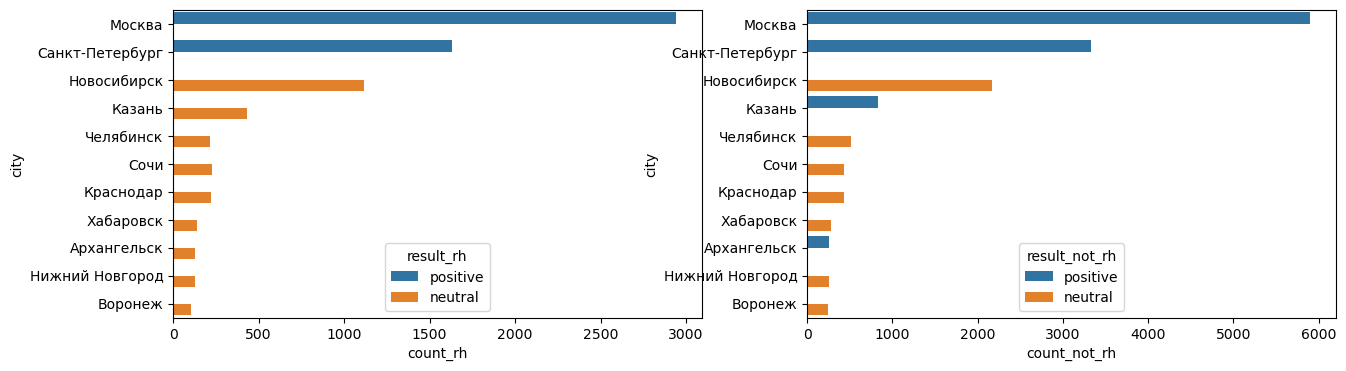

In [18]:
###### Визуализируем результат АВ-теста по отдельности на пиковых и не-пиковых часах
fig, ax = plt.subplots(ncols=2, figsize=(15, 4))

g1 = sns.barplot(x = 'count_rh', 
            y = 'city', 
            hue = 'result_rh',
            data = df_result, 
            ax = ax[0])


g2 = sns.barplot(x = 'count_not_rh', 
            y = 'city', 
            hue = 'result_not_rh',
            data = df_result, 
            ax = ax[1])

sns.move_legend(g1, "lower center")
sns.move_legend(g2, "lower center")

plt.show()


### Задание 3.5
Опишите ваши результаты. Ваши выводы можно оформить внутри тетрадки .ipynb

 * Группа А - контрольная, без изменения механики
 * Группа В - тестовая, с новой платежной механикой, которая должна немного понизить цену на услугу

##### Результаты АВ-теста на всей выборке 
Конверсия в заказ в группе В улучшилась статистически значимо.

##### Результаты АВ-теста по городам

 * положительные статистически значимые: 3 города (Москва, Санкт-Петербург и Казань)
 * отрицательные статистически значимы: нет
 * нейтральные:   8 оставшихся городов
 
Предположения, почему так много нейтральных городов:
 * не хватило наблюдений. **Предложение:** расчитать кол-во необходимых наблюдений и повторить тест
 * разница в стоимости была настолько не значительна, что не вызвала изменений. Так как положительные результаты были выявленны в крупных городах, где стоимость заказа значительно выше регионов. **Предложение:** проверить разницу в стоимости поездки в нейтральных городах и сравнить с положительными. 
 
##### Результаты АВ-теста по пиковыми / не-пиковым часам

Конверсия в заказ в группе В улучшилась статистически значимо как в пиковые, так и не пиковые часы

##### Результаты АВ-теста по пиковыми / не-пиковым часам по городам

**Пиковые часы**
 * положительные статистически значимые: в 2 городах (Москва, Санкт-Петербург), в остальных - нейтральные

**Не пиковые часы**
 * положительные статистически значимые: в 4 городах (Москва, Санкт-Петербург, Казань, Архангельск), в остальных - нейтральные
 
Предположения, в расхождениях:
 * не хватило наблюдений в пиковые часы, в обычные часы наблюдений в 2 раза больше. **Предложение:** расчитать кол-во необходимых наблюдений и повторить тест
 * В непиковые часы у клиентов было время, для сравнения цены поездки и общественного транспорте например. И более низкие цены решали в нашу пользу. **Предложение:** проверить разницу в стоимости поездки в положительных городах не пиковых часах и сравнить с разницей в стоимостьи в пиковые часы.


